In [1]:
from PIL import Image
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img_path = "borang_compress_1.png"

In [3]:
reader = easyocr.Reader(['ms'], gpu=True)
result = reader.readtext(img_path)

In [4]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [5]:
[print(detection[0][0][0]) for detection in result]

649
635
185
665
107
75
211
55
80
229
259
303
383
435
507
627
711
80
217
251
317
389
429
487
625
695
81
80
351
80
455
565
607
731
81
333
78
393
71
101
127
483
101
335
513
101
127
390
511
625
101
354
354
101
351
488
101
193
99
354
101
159
355
70
99
232
101
459
487
101
295
357
511
553
629
665
100
361
287
457
547
653
101
345
345
255.1401328392153
305.4452998037748


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [6]:
[print(tuple([int(detection[0][0][0]), int(detection[0][0][1])])) for detection in result]

(649, 17)
(635, 37)
(185, 127)
(665, 139)
(107, 145)
(75, 164)
(211, 183)
(55, 245)
(80, 259)
(229, 261)
(259, 261)
(303, 261)
(383, 261)
(435, 263)
(507, 263)
(627, 261)
(711, 261)
(80, 276)
(217, 277)
(251, 277)
(317, 277)
(389, 277)
(429, 277)
(487, 277)
(625, 277)
(695, 277)
(81, 293)
(80, 308)
(351, 308)
(80, 322)
(455, 324)
(565, 325)
(607, 324)
(731, 325)
(81, 339)
(333, 341)
(78, 354)
(393, 357)
(71, 389)
(101, 421)
(127, 453)
(483, 452)
(101, 483)
(335, 485)
(513, 483)
(101, 515)
(127, 609)
(390, 608)
(511, 609)
(625, 609)
(101, 640)
(354, 640)
(354, 669)
(101, 703)
(351, 703)
(488, 702)
(101, 735)
(193, 735)
(99, 765)
(354, 766)
(101, 781)
(159, 783)
(355, 796)
(70, 829)
(99, 863)
(232, 862)
(101, 895)
(459, 895)
(487, 895)
(101, 927)
(295, 925)
(357, 925)
(511, 927)
(553, 927)
(629, 927)
(665, 927)
(100, 956)
(361, 957)
(287, 975)
(457, 975)
(547, 975)
(653, 975)
(101, 1002)
(345, 1003)
(345, 1035)
(255, 336)
(305, 339)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

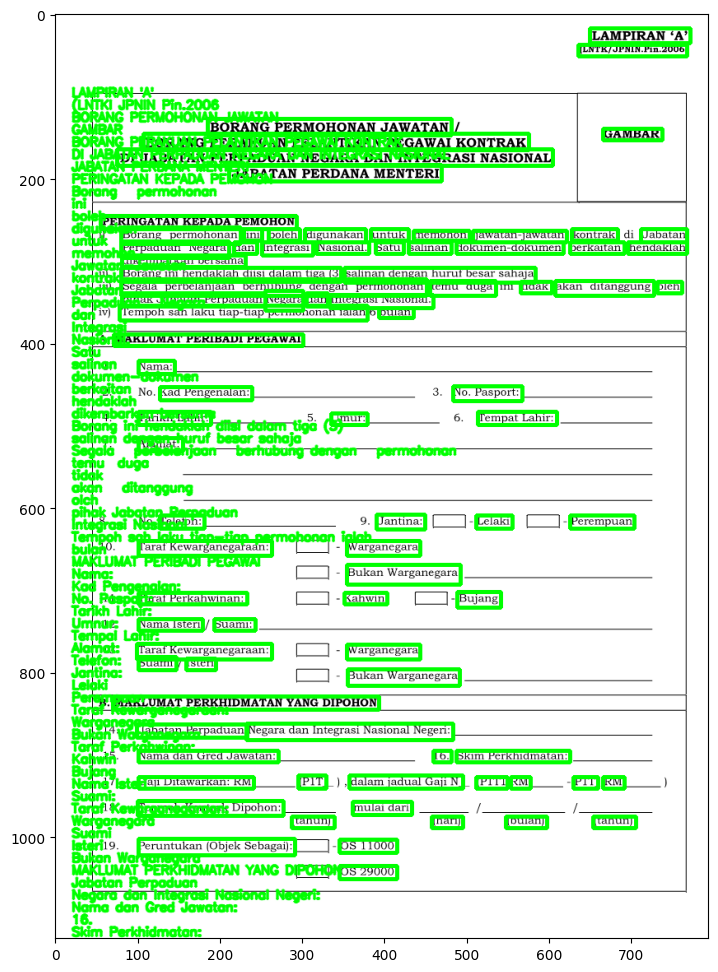

In [7]:
img = cv2.imread(img_path)
spacer = 100
for detection in result: 
    #top_left = tuple(detection[0][0])
    top_left = tuple([int(detection[0][0][0]), int(detection[0][0][1])])
    #bottom_right = tuple(detection[0][2])
    bottom_right = tuple([int(detection[0][2][0]), int(detection[0][2][1])])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

plt.figure(figsize=(20,12))
plt.imshow(img)
plt.show()

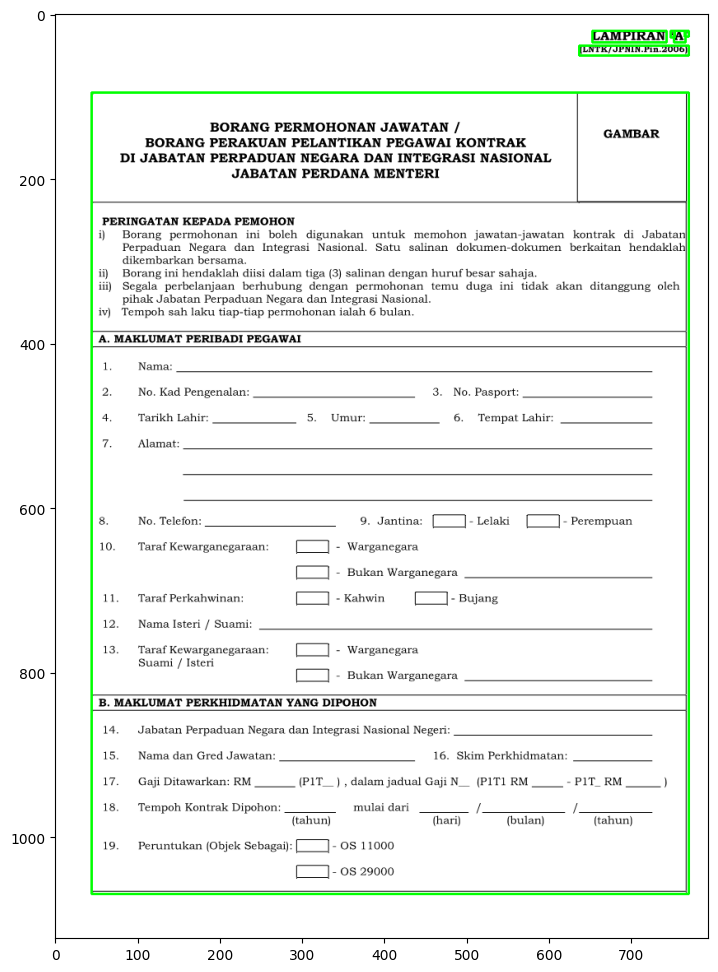

In [8]:
img = cv2.imread(img_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
blur = cv2.GaussianBlur(gray,(5,5),0)

ret, thresh1 = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV) 

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)) 

dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                cv2.CHAIN_APPROX_NONE) 

for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 

    roi = thresh1[y:y+h, x:x+w]
    
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(20,12))
plt.imshow(img)
plt.show()

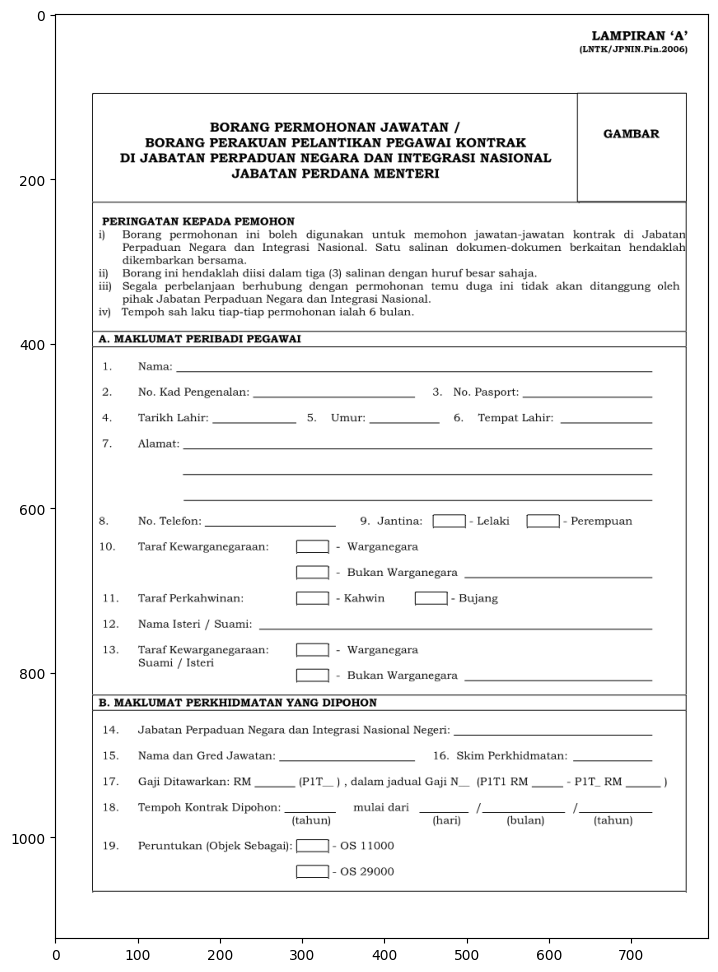

In [9]:
im = cv2.imread(img_path)
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200
# Filter by Area.
params.filterByArea = True
params.minArea = 1500
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
# Create a detector with the parameters
# OLD: detector = cv2.SimpleBlobDetector(params)
detector = cv2.SimpleBlobDetector_create(params)
# Detect blobs.
keypoints = detector.detect(im)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Show blobs
plt.figure(figsize=(20,12))
plt.imshow(im_with_keypoints)
plt.show()
